In [33]:
%matplotlib notebook

import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=1)

In [107]:
nb_of_samples_per_class = 20
red_mean = (-1., 0.)
blue_mean = (1., 0.)

x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) + blue_mean

X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class, 1)), np.ones((nb_of_samples_per_class, 1))))

<IPython.core.display.Javascript object>


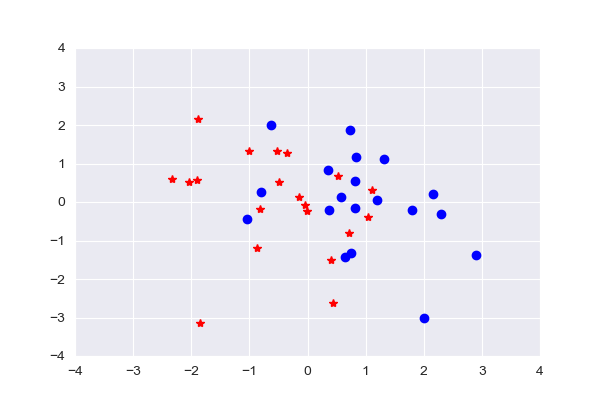

(-4.0, 4.0, -4.0, 4.0)

In [108]:
plt.figure(figsize=(6,4))
plt.plot(X[0:20,0], x_red[0:20, 1], 'r*', label='class: red star')
plt.plot(X[21:40,0], X[21:40,1], 'bo', label='class: blue circle')
plt.axis([-4, 4, -4, 4])

In [109]:
def logistic(z):
    return 1. / (1 + np.exp(-z))

def nn(x,w):
    return logistic(x.dot(w.T))

def nn_predict(x, w):
    return np.around(nn(x,w))

def loss(y, t):
    return - np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

<IPython.core.display.Javascript object>


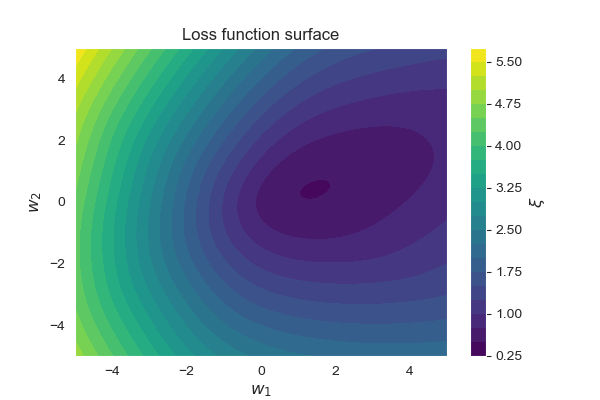

In [110]:
nb_of_ws = 100 # compute the loss nb_of_ws times in each dimension
wsa = np.linspace(-5, 5, num=nb_of_ws) # weight a
wsb = np.linspace(-5, 5, num=nb_of_ws) # weight b
ws_x, ws_y = np.meshgrid(wsa, wsb) # generate grid
loss_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i,j] = loss(
            nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
        
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function surface')
plt.grid()
plt.show()

In [119]:
def gradient(x, w, t):
    return (nn(x,w) - t).T * x

def delta_w(x,w,t,lr):
    return lr * gradient(x,w,t)

In [122]:
# Set the initial weight parameter
w = np.asmatrix([-4, -2])  # Randomly decided
# Set the learning rate
learning_rate = 0.05

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 10  # Number of gradient descent updates
w_iter = [w]  # List to store the weight values over the iterations
for i in range(nb_of_iterations):
    dw = delta_w(X,w, t, learning_rate)  # Get the delta w update
    w = w - dw  # Update the weights
    w_iter.append(w)  # Store the weights for plotting

<IPython.core.display.Javascript object>


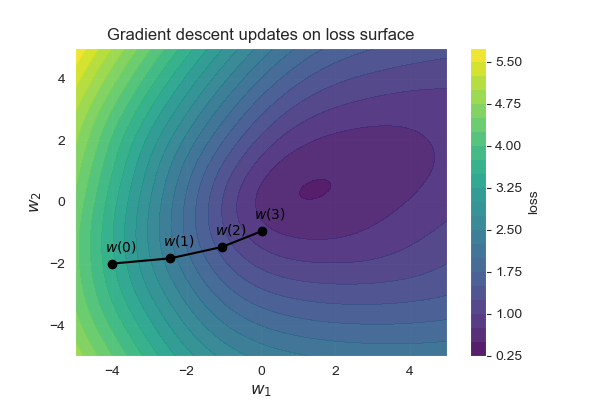

In [130]:
# Plot the first weight updates on the error surface
# Plot the error surface
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# Plot the updates
for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-loss values that represents the update
    plt.plot(w1[0,0], w1[0,1], 'ko')  # Plot the weight-loss value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')
# Plot the last weight
w1 = w_iter[3]  
plt.plot(w1[0,0], w1[0,1], 'ko')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='k') 
# Show figure
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()
#